<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

**First of all, drop customerID column as it is of no use**

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [ ]:
df.TotalCharges.values

**Ahh... it is string. Lets convert it to numbers**

In [ ]:
pd.to_numeric(df.TotalCharges)

**Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**

In [ ]:
# errors argument will do conversion if it is not error otherwise it will fill nan
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

In [ ]:
df.shape

In [ ]:
df.iloc[488].TotalCharges

In [ ]:
df[df.TotalCharges!=' '].shape

**Remove rows with space in TotalCharges**

In [ ]:
df1 = df[~pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# or df1 = df[df.TotalCharges != ' ']
df1.shape

In [ ]:
df1.dtypes

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.values

In [ ]:
# tenure means how loyel the customer is
# so we want to know the loyal customers who are leaving the business

In [ ]:
df1[df1.Churn=='No']

**Data Visualization**

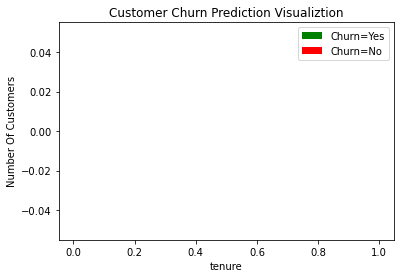

In [43]:
# if churn is no -> he is not leaving(red)
# if churn is yes -> he is leaving(green)
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [44]:
# the above graph suggests that 
# customers with long tenure are not leaving(>1000)

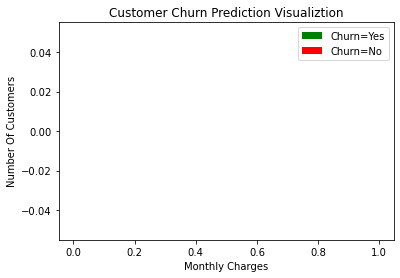

In [45]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [46]:
# the above plot suggests that customers with less charges are not leaving

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [47]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [48]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [49]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [50]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


**Convert Yes and No to 1 or 0**

In [51]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [52]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [53]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [54]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [55]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [56]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2431,0,1,0,0,2,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4451,0,1,0,0,45,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2403,1,0,1,0,71,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0
2989,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5975,0,0,1,1,7,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [57]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [58]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [59]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [61]:
X_train.shape

(5625, 26)

In [62]:
X_test.shape

(1407, 26)

In [63]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [64]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [65]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                405       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [66]:

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train.values, y_train.values, epochs=10)

Train on 5625 samples
Epoch 1/10
5625/5625 [==============================] - 2s 376us/sample - loss: 0.5169 - accuracy: 0.7355
Epoch 2/10
5625/5625 [==============================] - 2s 337us/sample - loss: 0.4272 - accuracy: 0.8012
Epoch 3/10
5625/5625 [==============================] - 2s 375us/sample - loss: 0.4180 - accuracy: 0.8012
Epoch 4/10
5625/5625 [==============================] - 2s 391us/sample - loss: 0.4140 - accuracy: 0.8069
Epoch 5/10
5625/5625 [==============================] - 2s 393us/sample - loss: 0.4116 - accuracy: 0.8076
Epoch 6/10
5625/5625 [==============================] - 2s 399us/sample - loss: 0.4100 - accuracy: 0.8108
Epoch 7/10
5625/5625 [==============================] - 2s 395us/sample - loss: 0.4088 - accuracy: 0.8112
Epoch 8/10
5625/5625 [==============================] - 2s 393us/sample - loss: 0.4082 - accuracy: 0.8084
Epoch 9/10
5625/5625 [==============================] - 2s 402us/sample - loss: 0.4068 - accuracy: 0.8082
Epoch 10/10
5625/5625 [=

In [83]:
# model.evaluate(X_test.values, y_test.values)

In [69]:
yp = model.predict(X_test.values)
yp[:5]

array([[0.17351651],
       [0.32403234],
       [0.01607054],
       [0.7571979 ],
       [0.5172864 ]], dtype=float32)

In [70]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [71]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [72]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

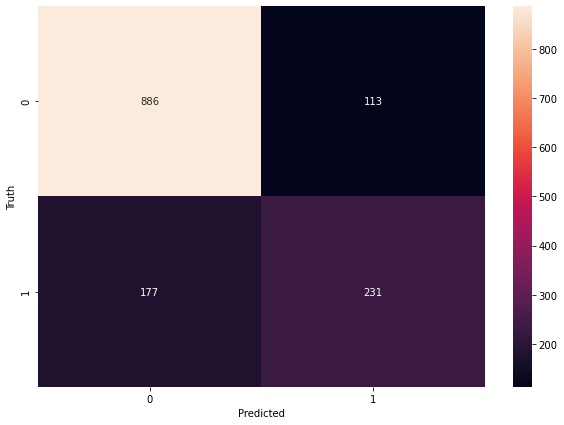

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
y_test.shape

(1407,)

**Accuracy**

In [78]:
round((886+231)/(886+231+177+113),2)

0.79

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [79]:
round(886/(886+117),2)

0.88

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [80]:
round(231/(231+113),2)

0.67

**Recall for 0 class**

In [81]:
round(886/(886+113),2)

0.89

**Recall for 1 class**

In [82]:
round(177/(177+231),2)

0.43